I have copied the image files (human face images & dog images) from kaggel to s3 bucket, and downloaded it through below command in sagemaker environment. 

In [24]:
!wget http://capstonedataset.s3.amazonaws.com/human_files.zip

--2020-09-08 23:16:35--  http://capstonedataset.s3.amazonaws.com/human_files.zip
Resolving capstonedataset.s3.amazonaws.com (capstonedataset.s3.amazonaws.com)... 52.216.185.219
Connecting to capstonedataset.s3.amazonaws.com (capstonedataset.s3.amazonaws.com)|52.216.185.219|:80... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: http://capstonedataset.s3.us-east-2.amazonaws.com/human_files.zip [following]
--2020-09-08 23:16:35--  http://capstonedataset.s3.us-east-2.amazonaws.com/human_files.zip
Resolving capstonedataset.s3.us-east-2.amazonaws.com (capstonedataset.s3.us-east-2.amazonaws.com)... 52.219.100.250
Connecting to capstonedataset.s3.us-east-2.amazonaws.com (capstonedataset.s3.us-east-2.amazonaws.com)|52.219.100.250|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198085104 (189M) [application/zip]
Saving to: ‘human_files.zip’

human_files.zip     100%[===================>] 188.91M  90.9MB/s    in 2.1s    

2020-09-08 23:

In [30]:
!unzip -o dataset/human_files.zip

Archive:  dataset/human_files.zip
   creating: human_files/
   creating: human_files/lfw/
  inflating: __MACOSX/human_files/._lfw  
   creating: human_files/lfw/German_Khan/
  inflating: __MACOSX/human_files/lfw/._German_Khan  
   creating: human_files/lfw/Stefano_Gabbana/
  inflating: __MACOSX/human_files/lfw/._Stefano_Gabbana  
   creating: human_files/lfw/Dragan_Covic/
  inflating: __MACOSX/human_files/lfw/._Dragan_Covic  
   creating: human_files/lfw/Jeff_Hornacek/
  inflating: __MACOSX/human_files/lfw/._Jeff_Hornacek  
   creating: human_files/lfw/Sureyya_Ayhan/
  inflating: __MACOSX/human_files/lfw/._Sureyya_Ayhan  
   creating: human_files/lfw/Deb_Santos/
  inflating: __MACOSX/human_files/lfw/._Deb_Santos  
   creating: human_files/lfw/Bob_Newhart/
  inflating: __MACOSX/human_files/lfw/._Bob_Newhart  
   creating: human_files/lfw/Wang_Hailan/
  inflating: __MACOSX/human_files/lfw/._Wang_Hailan  
   creating: human_files/lfw/Paul_McNulty/
  inflating: __MACOSX/human_files/lfw/._P

In [1]:
!wget http://capstonedataset.s3.amazonaws.com/dog_files.zip

--2020-09-12 03:41:41--  http://capstonedataset.s3.amazonaws.com/dog_files.zip
Resolving capstonedataset.s3.amazonaws.com (capstonedataset.s3.amazonaws.com)... 52.219.104.252
Connecting to capstonedataset.s3.amazonaws.com (capstonedataset.s3.amazonaws.com)|52.219.104.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1137047714 (1.1G) [application/zip]
Saving to: ‘dog_files.zip.1’

dog_files.zip.1     100%[===================>]   1.06G  93.6MB/s    in 11s     

2020-09-12 03:41:53 (94.5 MB/s) - ‘dog_files.zip.1’ saved [1137047714/1137047714]



below command unzips the file

In [2]:
!unzip -o dataset/dog_files.zip

Archive:  dataset/dog_files.zip
   creating: dog_files/
   creating: dog_files/dogImages/
  inflating: __MACOSX/dog_files/._dogImages  
   creating: dog_files/dogImages/valid/
  inflating: __MACOSX/dog_files/dogImages/._valid  
   creating: dog_files/dogImages/test/
  inflating: __MACOSX/dog_files/dogImages/._test  
   creating: dog_files/dogImages/train/
  inflating: __MACOSX/dog_files/dogImages/._train  
   creating: dog_files/dogImages/valid/122.Pointer/
  inflating: __MACOSX/dog_files/dogImages/valid/._122.Pointer  
   creating: dog_files/dogImages/valid/069.French_bulldog/
  inflating: __MACOSX/dog_files/dogImages/valid/._069.French_bulldog  
   creating: dog_files/dogImages/valid/124.Poodle/
  inflating: __MACOSX/dog_files/dogImages/valid/._124.Poodle  
   creating: dog_files/dogImages/valid/112.Nova_scotia_duck_tolling_retriever/
  inflating: __MACOSX/dog_files/dogImages/valid/._112.Nova_scotia_duck_tolling_retriever  
   creating: dog_files/dogImages/valid/043.Canaan_dog/
  inf

In [1]:
import numpy as np
from glob import glob

In [2]:
dog_files = np.array(glob("dog_files/dogImages/*/*/*"))
human_files = np.array(glob("human_files/lfw/*/*"))

In [3]:
print('There are %d total dog images.' % len(dog_files))
print('There are %d total human images.' % len(human_files))

There are 8351 total dog images.
There are 13233 total human images.


In [4]:
human_files[1]

'human_files/lfw/Mark_Hanson/Mark_Hanson_0001.jpg'

This step is to detect human faces.OpenCV's implementation of Haar feature-based cascade classifiers is 
used for this purpose. OpenCV provides many pre-trained face detectors, one of these detectors is downloaded
and stored it in haarcascades directory. 

Number of faces detected: 3


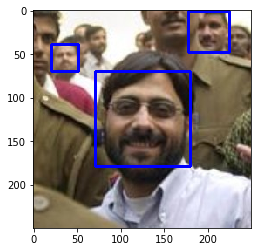

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline    
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[2])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()


It is required to convert the grayscale imapge to multiscale. The detectMultiScale function does that for all the image files and returns either ture or false based on human face exist or not.

In [6]:
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

To test face_detector function accuracy, I tested first 100 human files images. The algorithem provided 99% accuracy for human files, which seems good.

In [7]:
human_files_100 = human_files[:100]
dog_files_100 = dog_files[:100]
face_dec = np.vectorize(face_detector)
human_face_detected =face_dec(human_files_100)
dog_detected = face_dec(dog_files_100)

print(" Human Face Detected with {:.1f}% accuracy".format(sum(human_face_detected)))
print("Dog detected with  {:.1f}% error".format(sum(dog_detected)))

 Human Face Detected with 99.0% accuracy
Dog detected with  14.0% error


This step is to detect dog images. I used a pre-trained model to detect dogs in images.

In [8]:
conda install pytorch torchvision -c pytorch

failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


Pre-trained VGG-16 model is used to detect the dog impage in the images.I have downloaded VGG-16 model, along with weights that have been trained on ImageNet.

In [9]:
import torch
import torchvision.models as models

VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
print("cuda available? {0}".format(use_cuda))

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/ec2-user/.cache/torch/hub/checkpoints/vgg16-397923af.pth



cuda available? False


Given an image, pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

Below is the step where image is provided as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model. The output will always be an integer between 0 and 999.

In [10]:
from PIL import Image
import torchvision.transforms as transforms

def load_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    # resize to (244, 244) because VGG16 accept this shape
    in_transform = transforms.Compose([
                        transforms.Resize(size=(244, 244)),
                        transforms.ToTensor()]) # normalizaiton parameters from pytorch doc.

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [11]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
   
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = VGG16(img)
    return torch.max(ret,1)[1].item() # predicted class index

In [12]:
VGG16_predict(dog_files_100[0])

153

with above dictinary we can see that categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, so to check if an image is predicted to contain a dog by the pre-trained VGG-16 model,its only needed to check if the pre-trained model predicts an index between 151 and 268 (inclusive).

In [13]:
def dog_detector(img_path):
    ## TODO: Complete the function.
    idx = VGG16_predict(img_path)
    return idx >= 151 and idx <= 268 # true/false

In [14]:
print(dog_detector(dog_files_100[0]))
print(dog_detector(human_files_100[0]))

True
False


Below step detects how many percentage of dogs images has been identified in human image files and how many percentage of dogs images has been detected in dog impage files.

In [15]:
def dog_detector_test(files):
    detection_cnt = 0;
    total_cnt = len(files)
    for file in files:
        detection_cnt += dog_detector(file)
    return detection_cnt, total_cnt

In [16]:
print("detect a dog in human_files: {} / {}".format(dog_detector_test(human_files_100)[0], dog_detector_test(human_files_100)[1]))
print("detect a dog in dog_files: {} / {}".format(dog_detector_test(dog_files_100)[0], dog_detector_test(dog_files_100)[1]))

detect a dog in human_files: 0 / 100
detect a dog in dog_files: 88 / 100


Next step is to work on model to to predict breed from images. For this project purpose  CNN model is used to  classify dog breeds.

In [17]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torch
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


batch_size = 20
num_workers = 0

data_dir = 'dog_files/dogImages/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

In [18]:
standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

In [19]:
data_transforms = {'train': transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'val': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])
                  }

Image folder is used to load train,validation and test data.

In [20]:
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['val'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

In [21]:
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

Below step will create CNN to classify dog breed.

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

num_classes = 133 # total classes of dog breeds

In [23]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # pool
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected
        self.fc1 = nn.Linear(7*7*128, 500)
        self.fc2 = nn.Linear(500, num_classes) 
        
        # drop-out
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        # flatten
        x = x.view(-1, 7*7*128)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# instantiate the CNN
model_scratch = Net()
print(model_scratch)


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


For first 2 convolution layer kernel_size of 3 with stride 2 is used which will lead to downsize of input image by 2. After 2 conv layers, maxpooling with stride 2 is placed and this will lead to downsize of input image by 2. The 3rd conv layers is consist of kernel_size of 3 with stride 1, and this will not reduce input image. after final maxpooling with stride 2, the total output image size is downsized by factor of 32 and the depth will be 128. Here dropout of 0.3 is applied  in order to prevent overfitting. Fully-connected layer is placed and then, 2nd fully-connected layer is intended to produce final output_size which predicts classes of breeds.

In [24]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.05)


Below is the function to train and test the model. Final model parameters are stored at 'model_scratch.pt'.

In [25]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, last_validation_loss=None):
    """returns trained model"""
    if last_validation_loss is not None:
        valid_loss_min = last_validation_loss
    else:
        valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
       
            # initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate loss
            loss = criterion(output, target)
            
            # back prop
            loss.backward()
            
            # grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [26]:

model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'saved_models/model_scratch.pt')

Epoch 1, Batch 1 loss: 4.920337
Epoch 1, Batch 101 loss: 4.887236
Epoch 1, Batch 201 loss: 4.882866
Epoch 1, Batch 301 loss: 4.878438
Epoch: 1 	Training Loss: 4.874822 	Validation Loss: 4.829017
Validation loss decreased (inf --> 4.829017).  Saving model ...
Epoch 2, Batch 1 loss: 4.982274
Epoch 2, Batch 101 loss: 4.815685
Epoch 2, Batch 201 loss: 4.812867
Epoch 2, Batch 301 loss: 4.796418
Epoch: 2 	Training Loss: 4.791155 	Validation Loss: 4.685120
Validation loss decreased (4.829017 --> 4.685120).  Saving model ...
Epoch 3, Batch 1 loss: 4.732880
Epoch 3, Batch 101 loss: 4.731255
Epoch 3, Batch 201 loss: 4.705284
Epoch 3, Batch 301 loss: 4.682000
Epoch: 3 	Training Loss: 4.677714 	Validation Loss: 4.537109
Validation loss decreased (4.685120 --> 4.537109).  Saving model ...
Epoch 4, Batch 1 loss: 4.624088
Epoch 4, Batch 101 loss: 4.609601
Epoch 4, Batch 201 loss: 4.593922
Epoch 4, Batch 301 loss: 4.590704
Epoch: 4 	Training Loss: 4.588912 	Validation Loss: 4.442710
Validation loss de

Below steps tests model on dog images. It also calculates and prints the test loss and accuracy.

In [28]:
def test(loaders, model, criterion, use_cuda):

    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.137570


Test Accuracy:  9% (77/836)


Below step will create CNN to classify dog breed. Transfer learning is used to  create a CNN.Separate data loaders 
for the training, validation, and test datasets of dog images are used.

In [29]:
loaders_transfer = loaders_scratch.copy()

Below step will create CNN to classify dog breed.

In [30]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ec2-user/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [31]:
for param in model_transfer.parameters():
    param.requires_grad = False

In [32]:
model_transfer.fc = nn.Linear(2048, 133, bias=True)

In [33]:
fc_parameters = model_transfer.fc.parameters()

In [34]:
for param in fc_parameters:
    param.requires_grad = True

In [35]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Here I have picked ResNet as a transfer model because it seems that it performs well on Image Classification. 
The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers.
Higher the number of hidden layers better the network.

In [36]:
if use_cuda:
    model_transfer = model_transfer.cuda()

Below function will specify loss function and optimizer

In [37]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

Below step will train the model & validate it. Final model parameters are stored at filepath 'model_transfer.pt'.

In [ ]:
# train the model
# train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate loss
            loss = criterion(output, target)
            
            # back prop
            loss.backward()
            
            # grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [ ]:
train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'saved_models/model_transfer.pt')

Epoch 1, Batch 1 loss: 4.983128
Epoch 1, Batch 101 loss: 4.920526
Epoch 1, Batch 201 loss: 4.880444
Epoch 1, Batch 301 loss: 4.840698
Epoch: 1 	Training Loss: 4.830424 	Validation Loss: 4.670412
Validation loss decreased (inf --> 4.670412).  Saving model ...
Epoch 2, Batch 1 loss: 4.676039
Epoch 2, Batch 101 loss: 4.661376
Epoch 2, Batch 201 loss: 4.637363
Epoch 2, Batch 301 loss: 4.613728
Epoch: 2 	Training Loss: 4.603798 	Validation Loss: 4.407187
Validation loss decreased (4.670412 --> 4.407187).  Saving model ...
Epoch 3, Batch 1 loss: 4.543524
Epoch 3, Batch 101 loss: 4.474329
Epoch 3, Batch 201 loss: 4.438740
Epoch 3, Batch 301 loss: 4.415401
Epoch: 3 	Training Loss: 4.407367 	Validation Loss: 4.174308
Validation loss decreased (4.407187 --> 4.174308).  Saving model ...
Epoch 4, Batch 1 loss: 4.268977
Epoch 4, Batch 101 loss: 4.282172
Epoch 4, Batch 201 loss: 4.263148
Epoch 4, Batch 301 loss: 4.238662
Epoch: 4 	Training Loss: 4.228749 	Validation Loss: 3.939752
Validation loss de

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [41]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('saved_models/model_transfer.pt'))

<All keys matched successfully>

Now we will test the accuracy of the model .I will use test dataset for dog images.

In [42]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.794394


Test Accuracy: 72% (610/836)


For this model accuracy is 72% which is greater than 50%.

Below step takes image path as input and returns the dog breed (Affenpinscher, Afghan hound, etc) 
that is predicted by your model.

In [43]:
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

In [44]:
loaders_transfer['train'].dataset.classes[:10]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog']

In [45]:
class_names[:10]

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog']

In [46]:
from PIL import Image
import torchvision.transforms as transforms

def load_input_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [47]:
def predict_breed_transfer(model, class_names, img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

In [49]:
for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    predition = predict_breed_transfer(model_transfer, class_names, img_path)
    print("image_file_name: {0}, \t predition breed: {1}".format(img_path, predition))

image_file_name: ./images/Brittany_02625.jpg, 	 predition breed: Brittany
image_file_name: ./images/Curly-coated_retriever_03896.jpg, 	 predition breed: Curly-coated retriever
image_file_name: ./images/sample_human_output.png, 	 predition breed: Chihuahua
image_file_name: ./images/webapp_2.png, 	 predition breed: Boxer
image_file_name: ./images/sample_cnn.png, 	 predition breed: Pomeranian
image_file_name: ./images/sample_dog_output.png, 	 predition breed: Greyhound
image_file_name: ./images/Welsh_springer_spaniel_08203.jpg, 	 predition breed: Welsh springer spaniel
image_file_name: ./images/Labrador_retriever_06449.jpg, 	 predition breed: Flat-coated retriever
image_file_name: ./images/Labrador_retriever_06455.jpg, 	 predition breed: Chesapeake bay retriever
image_file_name: ./images/American_water_spaniel_00648.jpg, 	 predition breed: Irish water spaniel
image_file_name: ./images/webapp_4.png, 	 predition breed: Dogue de bordeaux
image_file_name: ./images/Labrador_retriever_06457.jpg

Below step takes input file path to an image and  determines whether the image contains a human, dog, or neither.
If a dog is detected it should retrun predicted breed. 
If a human is detected in the image, it should return the predicted breed. 
If neither is detected in the image, it should provide the error in the output.

In [50]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path) is True:
        prediction = predict_breed_transfer(model_transfer, class_names, img_path)
        print("Dogs Detected!\nIt looks like a {0}".format(prediction))  
    elif face_detector(img_path) > 0:
        prediction = predict_breed_transfer(model_transfer, class_names, img_path)
        print("Hello, human!\nIf you were a dog..You may look like a {0}".format(prediction))
    else:
        print("Error! Can't detect anything..")

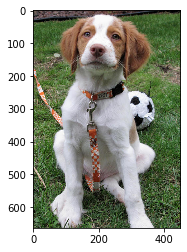

Dogs Detected!
It looks like a Brittany


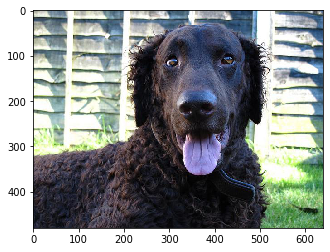

Dogs Detected!
It looks like a Curly-coated retriever


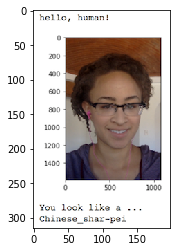

Hello, human!
If you were a dog..You may look like a Chihuahua


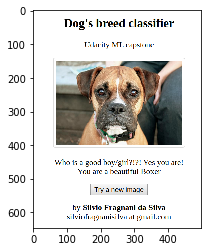

Dogs Detected!
It looks like a Boxer


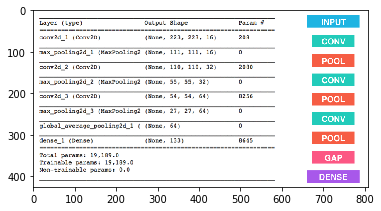

Error! Can't detect anything..


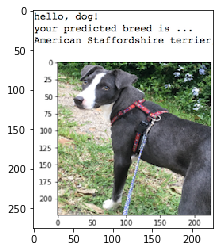

Dogs Detected!
It looks like a Greyhound


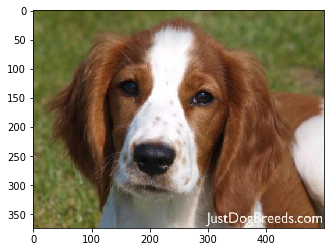

Dogs Detected!
It looks like a Welsh springer spaniel


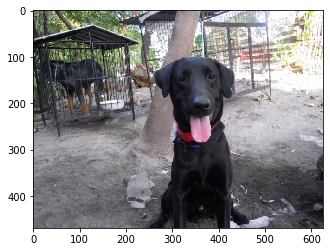

Dogs Detected!
It looks like a Flat-coated retriever


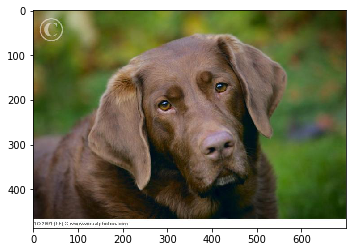

Dogs Detected!
It looks like a Chesapeake bay retriever


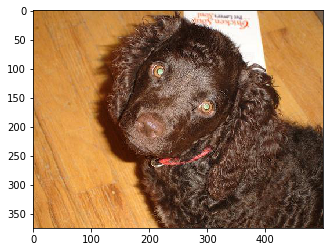

Dogs Detected!
It looks like a Irish water spaniel


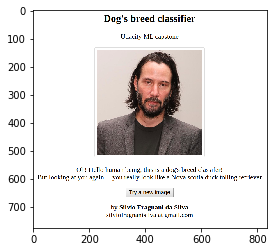

Hello, human!
If you were a dog..You may look like a Dogue de bordeaux


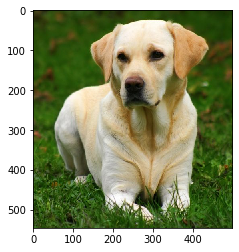

Dogs Detected!
It looks like a Golden retriever


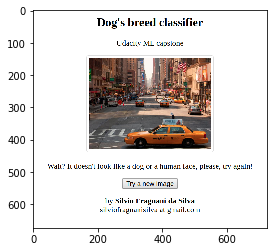

Error! Can't detect anything..


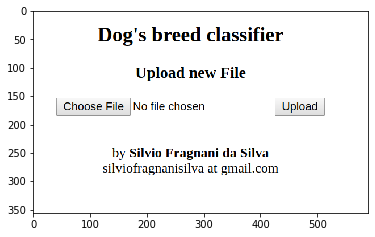

Error! Can't detect anything..


In [51]:
for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    run_app(img_path)

This step is to test the algorithm. Given the input impage of dog it will predict the breed. Given the impage of the human it should predict closest match of breed to image provided.

In [56]:
my_human_files = ['./test_images/human_1.jpg', './test_images/human_2.jpg', './test_images/human_3.jpg' ]
my_dog_files = ['./test_images/dog_shiba.jpeg', './test_images/dog_yorkshire.jpg', './test_images/dog_retreiver.jpg']

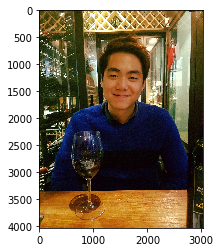

Hello, human!
If you were a dog..You may look like a Brussels griffon


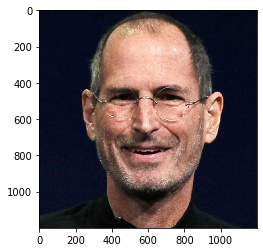

Hello, human!
If you were a dog..You may look like a Dogue de bordeaux


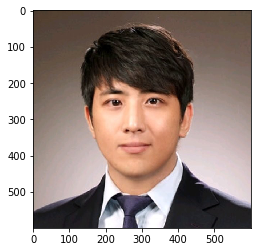

Hello, human!
If you were a dog..You may look like a Basenji


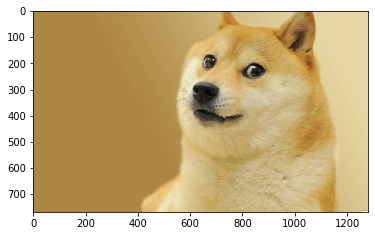

Error! Can't detect anything..


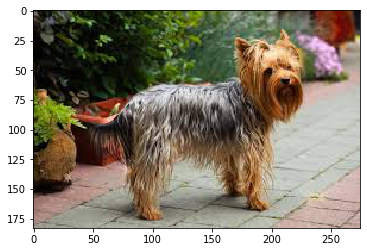

Dogs Detected!
It looks like a Australian terrier


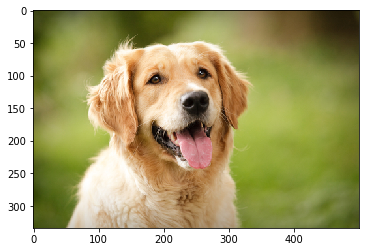

Dogs Detected!
It looks like a Golden retriever


In [58]:
## suggested code, below
for file in np.hstack((my_human_files, my_dog_files)):
    run_app(file)